#### Which machine learning models are sensitive to outliers?
1. Naive Bayes Classifier ---- Not sensitive to outliers.
2. SVM  ----                   Not sensitive to Outliers.
3. Linear Regression ---       Sensitive to Outliers.
4. Logistic Regression---      Sensitive to Outliers.
5. Decision Tree Regressor or Classifier--- Not Sensitive to Outliers
6. Ensemble Techniques(XGBoost, GB, RandomForest)--- Not Sensitive to Outliers
7. KNN   ----                  Not Sensitive to Outliers.
8. K-means---                  Sensitive to Outliers
9. Heirarichal---              Sensitive to Outliers
10. PCA---                     Sensitive to Outliers   
11. Neural Network---          Sensitive to Outliers 
#### Dont treat with outliers for sensitive algorithm for Credit Card Detection

In [1]:
import pandas as pd
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df['Age'].isnull().sum()

177

In [3]:
import seaborn as sns

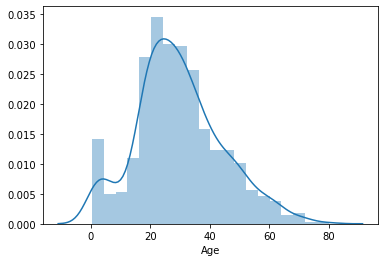

In [4]:
sns.distplot(df.Age.dropna())

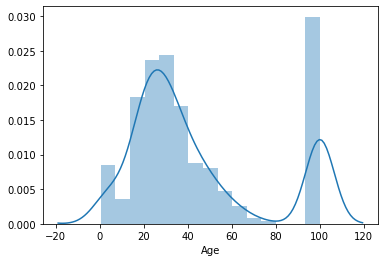

In [5]:
## Instead Drop fill with outlier
sns.distplot(df.Age.fillna(100))

### Gaussian Distribution

Text(0, 0.5, 'Non of passenger')

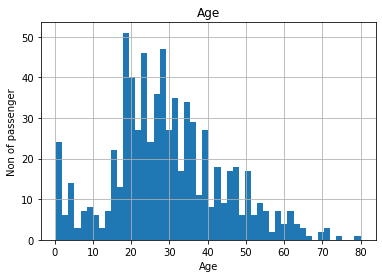

In [6]:
figure = df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('Non of passenger')

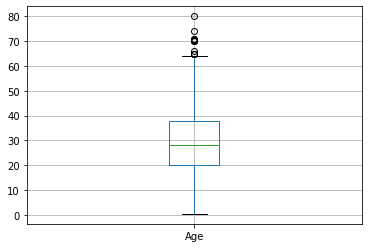

In [7]:
figure=df.boxplot(column='Age')

In [8]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

#### Assuing Age Follow a gaussian distribution we will calculate the boundaries which differnetiates the outliers

In [12]:
upper_bound = df['Age'].mean() + 3 * df['Age'].std()
lower_bound = df['Age'].mean() - 3 * df['Age'].std()

In [13]:
print(upper_bound), print(lower_bound), print(df['Age'].mean())

73.27860964406094
-13.880374349943303
29.69911764705882


(None, None, None)

In [14]:
##### Lets computer Interquantile range to calculate the boundaries
IQR = df.Age.quantile(0.75) - df.Age.quantile(0.25)

In [15]:
IQR

17.875

In [16]:
lower_bridge = df['Age'].quantile(0.25) - (IQR*1.5)
upper_bridge = df['Age'].quantile(0.75) + (IQR*1.5)
print(lower_bridge), print(upper_bridge)

-6.6875
64.8125


(None, None)

In [17]:
##### Extreme Outliers
lower_bridge = df['Age'].quantile(0.25) - (IQR*3)
upper_bridge = df['Age'].quantile(0.75) + (IQR*3)
print(lower_bridge), print(upper_bridge)

-33.5
91.625


(None, None)

### Features is Skewed

Text(0, 0.5, 'Non of passenger')

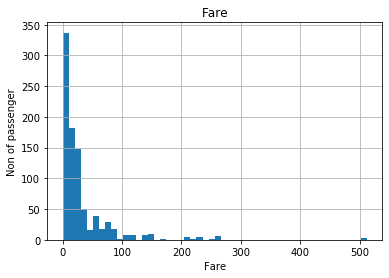

In [19]:
figure = df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('Non of passenger')

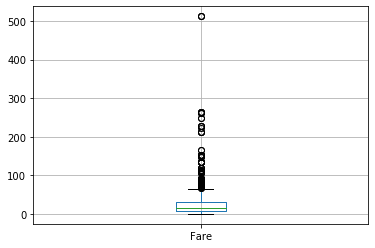

In [20]:
figure=df.boxplot(column='Fare')

In [21]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [22]:
##### Lets computer Interquantile range to calculate the boundaries
IQR = df.Fare.quantile(0.75) - df.Fare.quantile(0.25)

In [23]:
#### We cannot say which IQR to be used.

In [25]:
lower_bridge = df['Fare'].quantile(0.25) - (IQR*1.5)
upper_bridge = df['Fare'].quantile(0.75) + (IQR*1.5)
print(lower_bridge), print(upper_bridge)

-26.724
65.6344


(None, None)

In [29]:
##### Extreme Outliers
lower_bridge = df['Fare'].quantile(0.25) - (IQR*3)
upper_bridge = df['Fare'].quantile(0.75) + (IQR*3)
print(lower_bridge), print(upper_bridge)

-61.358399999999996
100.2688


(None, None)

In [32]:
data = df.copy()

In [33]:
data.loc[data['Age']>73, 'Age']=73

In [34]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
data.loc[data['Fare']>=100,'Fare']=100

In [36]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Text(0, 0.5, 'Non of passenger')

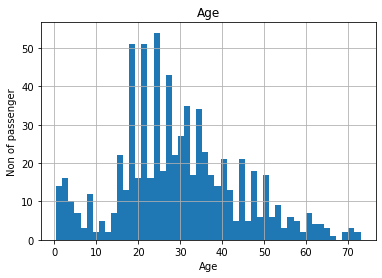

In [38]:
figure = data.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('Non of passenger')

Text(0, 0.5, 'Non of passenger')

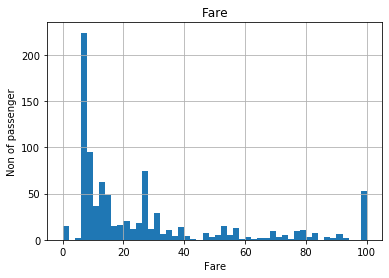

In [39]:
figure = data.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('Non of passenger')

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(df[['Age','Fare']].fillna(0),data['Survived'], test_size=0.3)

In [51]:
###Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_pred1 = classifier.predict_proba(x_test)
from sklearn.metrics import accuracy_score, roc_auc_score
print("Accuracy Score : {}".format(accuracy_score(y_test, y_pred)))
print("ROC_AUC Score : {}".format(roc_auc_score(y_test, y_pred1[:,1])))

Accuracy Score : 0.6305970149253731
ROC_AUC Score : 0.6975677715214489


In [59]:
###Ensemble Techniques
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_pred1 = classifier.predict_proba(x_test)
from sklearn.metrics import accuracy_score, roc_auc_score
print("Accuracy Score : {}".format(accuracy_score(y_test, y_pred)))
print("ROC_AUC Score : {}".format(roc_auc_score(y_test, y_pred1[:,1])))

Accuracy Score : 0.6455223880597015
ROC_AUC Score : 0.7006766696087083
